# 3  Machine Learning in Practice 

(3.1) This basic fintech firm is a very basic version of the challenger banks like Monzo and Sterling bank where the bank has access to the spending habit database of their customers and on the basis of that this firm would like to give out loan by analysing the annual salary, loan amount, loan period, age and gender of the individual and on the event of this, our firm would like to analyse the credit risk of the individuals. Sarunas FinTech firm through computer is essentially made up of 4 parts. The first one is the Streamlit UI which is a web framework intended for deploying models and visualizations using Python. In our model here we will apply for the loan in this website. The second one is the FastAPI which is our credit risk model that gives us the score, essentially it tells us, how are the customers going to pay back the loan or not. And obviously this model will help us detect those customers who don't re-pay us back. Both the Streamlit and the FastAPI are connected with a Json which is an open standard and data interchange format, that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and array data types. then we have the database like Postgres where we store all the information as we do in case of excel that can have integer, string as well as float variables. Finally we have the Jupytern notebook which is the analysis part and helps to rundifferent programming languages such as python, c++ etc.

# 3.2 The Model 

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

In [2]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [ ]:
# Simple model with only continuous variables and no categorical variables. Here we have just taken the loan amount, annual income, term time and the employment length to analyse the credit risk

In [4]:
Loan_model = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

In [ ]:
# We download the data on Loan repayment from 2007 to 2008 Q4 and import this in our jupyter notebook under the dataframe name of Loan_model.  

In [5]:
full_set = Loan_model.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [ ]:
# Here we have created two condition on the status of the loan. One is the Fully Paid, when the customers have repaid their loan amount in full and the other is the charged off when the customer has not repaid the loan.

In [6]:
full_set = full_set.dropna(subset=['emp_length'])


In [ ]:
# drop missing values help in making right decisions psrticularly in this situation

# Building the model - Logistic Regression

1. Transform our Label loan_status and other columns

In [7]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

In [8]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

In [9]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [10]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

In [12]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [13]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

Test Model

ROC-AUC-score:  0.6342094722892568


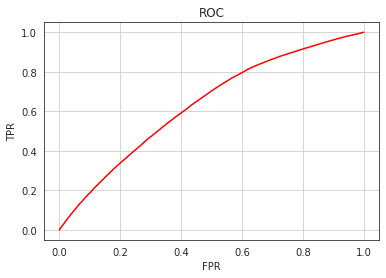

In [15]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [16]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [17]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [20]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

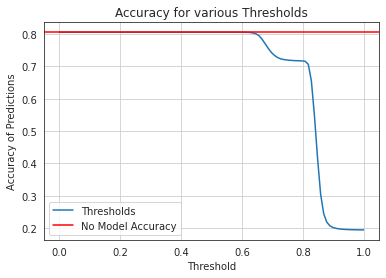

In [21]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [22]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

(3.3) The above model is a very simple model with 80% accuracy that people will pay their loans. But this does not happen in general in nature. In order to improve the model we can add more variables, particularly categorical variables along with the existing four which can describe the model in a better way. We can use non-linear models also. The big task is the way we process our data before going to the model. Also in the process to improve the model we should try to avoid overfitting the model. 